### Clustering with Gower's Distance

**Dataset Manipulation**  
Converted categorical variables to strings

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import rand_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import gower

dropout = pd.read_csv("../datasets/schooldropout.csv", sep=";")
target = dropout[["Target"]]
num = ["Admission grade", "Previous qualification (grade)","Unemployment rate","Inflation rate","GDP","Curricular units 1st sem (evaluations)","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 1st sem (without evaluations)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)","Curricular units 2nd sem (without evaluations)"]
dropout_nt = dropout.drop(['Target'],axis=1)
sum(dropout_nt.nunique()==1) # checks for variables with 1 level
dropout_nt_cat = dropout_nt.drop(num,axis=1)
dropout_nt_cat = dropout_nt_cat.applymap(str)
dropout_nt_num = dropout_nt[num]
dropout_nt = pd.concat([dropout_nt_cat,dropout_nt_num], axis=1)

**Gower's Distance**  
Computing the distance matrix via https://github.com/wwwjk366/gower  
*Currently inefficient*

In [57]:
import gower

dist_matrix = gower.gower_matrix(dropout_nt)
pd.DataFrame(dist_matrix)

,0,1,2,3,4,5,6,7,8,9,...,4414,4415,4416,4417,4418,4419,4420,4421,4422,4423
0,0.000000,0.389115,0.230200,0.304898,0.437034,0.514814,0.410624,0.313469,0.474468,0.421576,...,0.384478,0.498922,0.488006,0.360112,0.401909,0.367022,0.430359,0.390800,0.403141,0.395322
1,0.389115,0.000000,0.299266,0.308502,0.357540,0.455623,0.368884,0.343363,0.392076,0.290267,...,0.306546,0.420197,0.473208,0.278633,0.362850,0.287335,0.355723,0.325137,0.353746,0.354042
2,0.230200,0.299266,0.000000,0.352476,0.374963,0.453697,0.431886,0.196796,0.412397,0.330266,...,0.380378,0.407611,0.481491,0.298041,0.421710,0.331267,0.311271,0.300952,0.371263,0.388807
3,0.304898,0.308502,0.352476,0.000000,0.359311,0.455001,0.344623,0.384862,0.384560,0.336824,...,0.268325,0.414036,0.353494,0.274356,0.389982,0.273254,0.324497,0.313779,0.257821,0.236806
4,0.437034,0.357540,0.374963,0.359311,0.000000,0.284107,0.376215,0.417305,0.343855,0.400889,...,0.335458,0.359792,0.389716,0.284891,0.355863,0.367279,0.404609,0.287311,0.373233,0.364201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.367022,0.287335,0.331267,0.273254,0.367279,0.421378,0.325244,0.366185,0.291329,0.354486,...,0.337121,0.460689,0.414158,0.263224,0.357985,0.000000,0.342661,0.378863,0.353891,0.325747
4420,0.430359,0.355723,0.311271,0.324497,0.404609,0.509319,0.414886,0.403643,0.274410,0.232665,...,0.358165,0.409476,0.466429,0.271164,0.501967,0.342661,0.000000,0.360186,0.433029,0.317232
4421,0.390800,0.325137,0.300952,0.313779,0.287311,0.405344,0.205486,0.345048,0.292885,0.342766,...,0.288197,0.334169,0.390962,0.183096,0.367308,0.378863,0.360186,0.000000,0.199291,0.307498
4422,0.403141,0.353746,0.371263,0.257821,0.373233,0.422804,0.248902,0.376497,0.371793,0.358941,...,0.222339,0.412033,0.457397,0.229951,0.424113,0.353891,0.433029,0.199291,0.000000,0.340291


**Agglomerative Clustering**

Complete Linkage

c:\Users\timot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


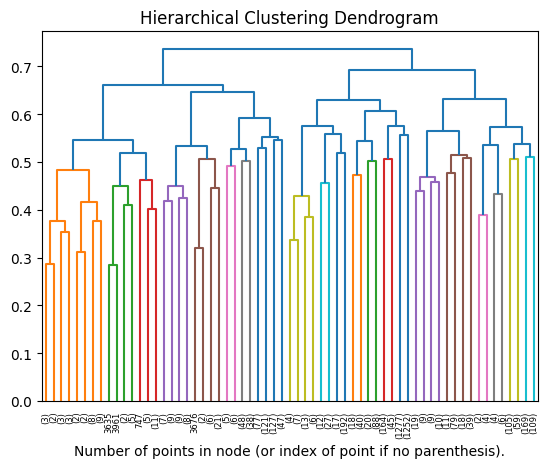

In [58]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


clusterer = AgglomerativeClustering(distance_threshold = 0.4, affinity='precomputed', linkage='complete', n_clusters=None).fit(dist_matrix)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clusterer, truncate_mode="level",p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering

clusterer = AgglomerativeClustering(n_clusters=3, affinity='precomputed', linkage='complete').fit(dist_matrix)
colors_clusters = clusterer.labels_

c:\Users\timot\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [65]:
clustering = pd.DataFrame(colors_clusters)
dropout = pd.concat([dropout, clustering], axis=1)
dropout2 = dropout[dropout.columns[-2:]]


Target
Dropout     [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Enrolled    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
Graduate    [[AxesSubplot(0.125,0.11;0.775x0.77)]]
dtype: object

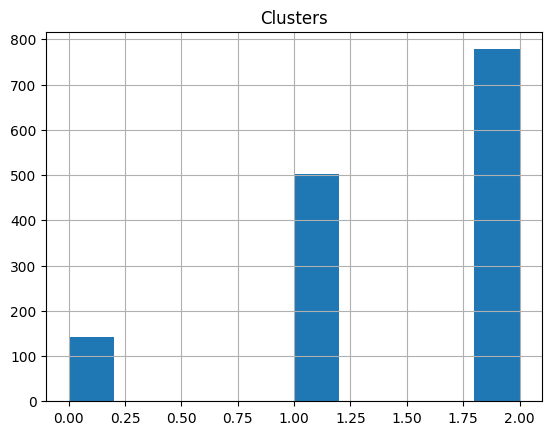

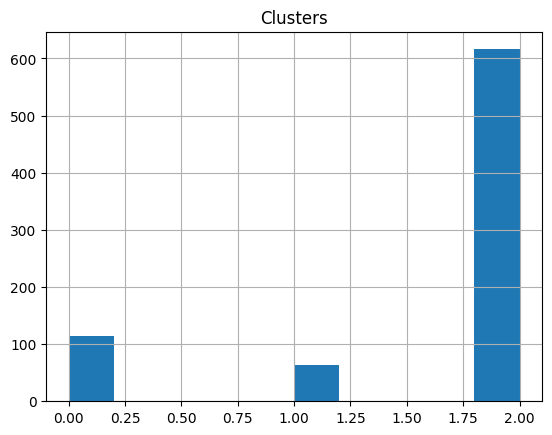

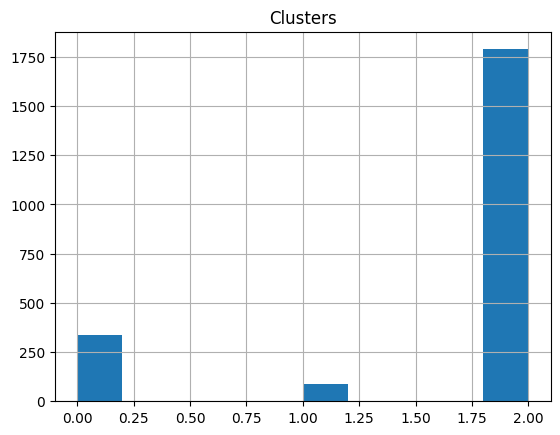

In [67]:
dropout2.columns = ["Target","Clusters"]
dropout2.groupby(['Target']).hist()